# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [27]:
# Importing relevant packages
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [6]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

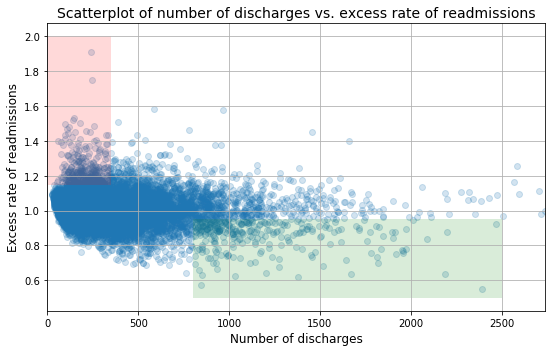

In [7]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [62]:
# Analysizing the Cleaned data.
cleaned_data=clean_hospital_read_df
cleaned_data.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [63]:
#Cleaning the data further
data=cleaned_data.loc[~pd.isnull(cleaned_data['Excess Readmission Ratio'])]

In [64]:
#Getting info about the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int32
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [65]:
data.head()


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


In [11]:
#Extracting relevant columns
df=data[['Number of Discharges','Excess Readmission Ratio']]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 2 columns):
Number of Discharges        11497 non-null int32
Excess Readmission Ratio    11497 non-null float64
dtypes: float64(1), int32(1)
memory usage: 224.6 KB


### Note: Hereafter I would be refering to hospitals with no. of discharges <= 100 as low capacity hospitals and to hospitals with no. of discharges >=1000 as high capacity hospitals.




In [ ]:
#Segregating the data into 2 subsets 
disc_le_100=df.loc[df['Number of Discharges']<=100] # Smaller or lower capacity hospital dataset.
disc_ge_1000=df.loc[df['Number of Discharges']>=1000]# Larger or higher capacity hospital dataset.

In [55]:
disc_le_100.info() # No missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223 entries, 1832 to 7749
Data columns (total 2 columns):
Number of Discharges        1223 non-null int32
Excess Readmission Ratio    1223 non-null float64
dtypes: float64(1), int32(1)
memory usage: 23.9 KB


In [15]:
disc_ge_1000.info()# No missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 8326 to 13666
Data columns (total 2 columns):
Number of Discharges        464 non-null int32
Excess Readmission Ratio    464 non-null float64
dtypes: float64(1), int32(1)
memory usage: 9.1 KB


### From above we can see that both the high capacity& low capacity datasets  are reasonably large & hence CLT will apply.Thus the difference of sample means of readmission rates between lower & higher capacity  hospitals is normally distributed.

### Ans A: Superficially the above analysis & recommendations does make sense.Visually the mean  readmission rate seems to go down as no. of discharges increases and lack of necessary resources with smaller hospitals may be one of the reasons for higher no. of readmissions. But a thorough investigation (done below) may throw more light on subject.

### Setting up the 2 sample difference of means  Z test between lower capacity hospitals & higher capacity hospitals.
### Here H0: Mean re-admission rate for low capacity hospital = Mean re-admission rate for high capacity hospital
###          H1: Mean re-admission rate for low capacity hospital > Mean re-admission rate for high capacity hospital



In [90]:
import statsmodels.stats.weightstats as st
mean_diff=disc_le_100['Excess Readmission Ratio'].mean() - disc_ge_1000['Excess Readmission Ratio'].mean()
print('The difference between the sample means of lower & higher capacity hospitals is: ',mean_diff)
z_statistics,pvalue =st.ztest(disc_le_100['Excess Readmission Ratio'],disc_ge_1000['Excess Readmission Ratio'])
print('The value Z_statistics for the difference of mean test is: ',z_statistics)
print('The corresponding value of the p value is: ',pvalue)

The difference between the sample means of lower & higher capacity hospitals is:  0.04375412196548889
The value Z_statistics for the difference of mean test is:  10.029895332413446
The corresponding value of the p value is:  1.126359400704904e-23


### Hence the null hypothesis of  equal means is rejected & alternative hypotheses is accepted at 1% level of significance.

In [67]:
# Extracting data with Excess re-admmision i.e. with re-admission ratio >1 for both lower capacity & 
# higher capacity hospitals.
df_ex_le=disc_le_100.loc[disc_le_100['Excess Readmission Ratio'] > 1]
df_ex_ge=disc_ge_1000.loc[disc_ge_1000['Excess Readmission Ratio'] > 1]

In [91]:
#Calculating the proportion of excess re-admission rates for lower & higher capacity hospitals
nl=disc_le_100['Excess Readmission Ratio'].size # no. of observations in lower capacity hospitals dataframe
nh=disc_ge_1000['Excess Readmission Ratio'].size # no. of observations in higher capacity hospitals data frame
p_l_100=df_ex_le[['Excess Readmission Ratio']].size/nl # proportion of excess re-admission rate for lower capacity hospitals
p_h_1000=df_ex_ge[['Excess Readmission Ratio']].size/nh # proportion of excess re-admission rate for higher capacity hospitals
print('No. of observations in the 2 samples are nl=',nl,'& nh=',nh,' .Hence CLT will be applicable')
print('The proportion of excess re-admission rate for lower capacity & higher capacity Hospitals are respectively: ',p_l_100,p_h_1000)

No. of observations in the 2 samples are nl= 1223 & nh= 464  .Hence CLT will be applicable
The proportion of excess re-admission rate for lower capacity & higher capacity Hospitals are respectively:  0.6263286999182338 0.44396551724137934


### Checking the  difference in proportions statistically by applying 2 sample difference in proportions Z test.
### H0: The proportions of excess re-admission rate for lower capacity & higher capacity hospitals are same.
### H1: The proportion of excess re-admission rate for lower capacity hospitals >  The proportion of excess re-admission rate for higher capacity hospitals.


In [92]:
#Applying difference in proportions Z test (as sample size is large)
pl=p_l_100
ph=p_h_1000
plh=(pl*nl+ph*nh)/(nl+nh)# pooled estimate of proportion of success.
qlh=1-plh
sigma=(plh*qlh*(1/nl +1/nh))**.5 # standard error
diff=(pl-ph)
Z=diff/sigma # Z statistics
print('The sample difference between excess re-admission rates is: ',diff)
print('The value for the Z statistics is: ',Z)
print('The critical value of z statistics for alpha=1% is: ',2.33)

The sample difference between excess re-admission rates is:  0.18236318267685447
The value for the Z statistics is:  6.768318227152663
The critical value of z statistics for alpha=1% is:  2.33


### From the above,  difference in proportion Z test , we observe that the proportion of excess re-admission rates for lower capacity hospitals is indeed  more than excess re-admission rates for higher capacity hospitals at 1% level of significance.

### Ans B 2), 3) & 4): From the above outputs we can see that mean  re-admission ratio for lower capacity hospitals is more than mean re-admission ratio for higher capacity hospitals at 1% level of significance with corresponding pvalue essentially being 0. But the sample mean difference , although statistically significant , is mere .043, which is of low practical significance.
### Similarly  proportion of excess re-admission rates for lower capacity hospitals is indeed more than excess re-admission rates for higher capacity hospitals at 1% level of significance. Here the sample difference between excess re-admission rates is:  0.182 , which is surely of practical significance.

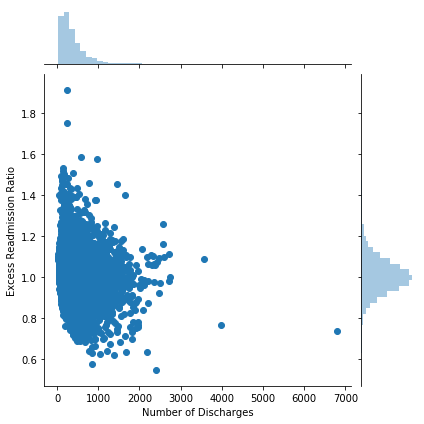

In [25]:
#Checking for the normality of Number of Discharges & Excess Readmission Ratio using seaborn jointplots.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
g = sns.jointplot(df['Number of Discharges'],df['Excess Readmission Ratio'])



In [28]:
# Applying  Shapiro wilk normaility test to the Number of Discharges series
from scipy import stats
sw_statistics,pvalue=stats.shapiro(df['Number of Discharges'])
print('The p value corresponding to the Shapirow wilk statistics is:',pvalue)

The p value corresponding to the Shapirow wilk statistics is: 0.0


In [29]:
# Applying  Shapiro wilk normaility test to the Excess Readmission Ratio series
from scipy import stats
sw_statistics,pvalue=stats.shapiro(df['Excess Readmission Ratio'])
print('The p value corresponding to the Shapirow wilk statistics is:',pvalue)

The p value corresponding to the Shapirow wilk statistics is: 4.203895392974451e-45


### From the above analysis , we can observe that both Number of Discharges & Excess Readmission Ratio series are not normal. Thus hence-forth log-log plots would be plotted so that the resulting data is more bell shaped.

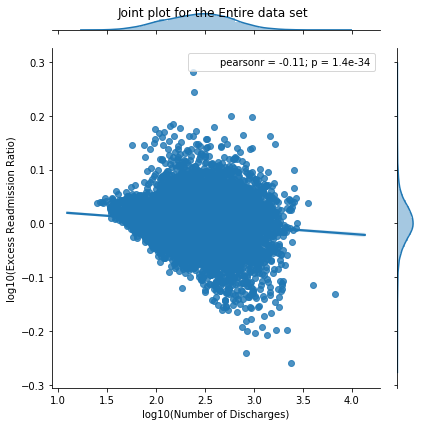

In [109]:
# plotting the joint plot of log('Number of Discharges') & log('Number of Discharges') for the entire sample
import seaborn as sns
plot = sns.jointplot(np.log10(df['Number of Discharges']),np.log10(df['Excess Readmission Ratio']), kind='reg',ratio=10)
plot.set_axis_labels('log10(Number of Discharges)','log10(Excess Readmission Ratio)')
plot.annotate(stats.pearsonr)
plt.suptitle('Joint plot for the Entire data set')
plt.tight_layout()
plt.show()

### From above we see that both log('Number of Discharges') & log('Excess Readmission Ratio') are approx bell shaped and thus p value of correlation coefficient between the them would be more appropriate & accurate.

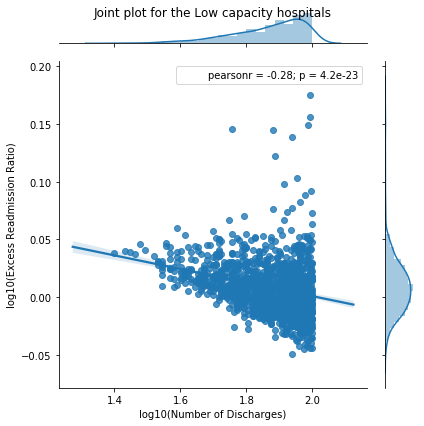

In [107]:
# plotting the joint plot of log('Number of Discharges') & log('Number of Discharges') for low capacity hospitals
import seaborn as sns
plot = sns.jointplot(np.log10(disc_le_100['Number of Discharges']),np.log10(disc_le_100['Excess Readmission Ratio']), kind='reg',ratio=7)
plot.set_axis_labels('log10(Number of Discharges)','log10(Excess Readmission Ratio)')
plt.suptitle('Joint plot for the Low capacity hospitals')
plot.annotate(stats.pearsonr)
plt.tight_layout()
plt.show()

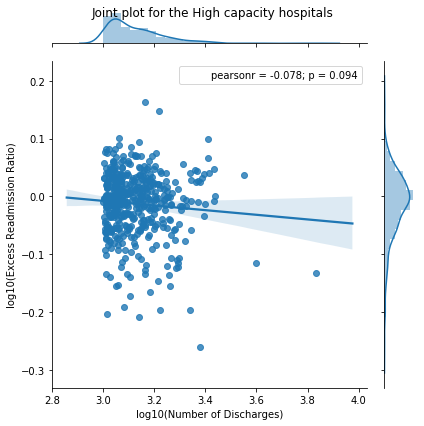

In [106]:
# plotting the joint plot of log('Number of Discharges') & log('Number of Discharges') for high capacity hospitals
import seaborn as sns
plot = sns.jointplot(np.log10(disc_ge_1000['Number of Discharges']),np.log10(disc_ge_1000['Excess Readmission Ratio']), kind='reg',ratio=7)
plot.set_axis_labels('log10(Number of Discharges)','log10(Excess Readmission Ratio)')
plt.suptitle('Joint plot for the High capacity hospitals')
plot.annotate(stats.pearsonr)
plt.tight_layout()
plt.show()

In [31]:
# Calculating the pearson coefficient between Number of Discharges & re-admission ratio For the entire dataset
import scipy.stats as st
corr,pvalue=st.pearsonr(df['Number of Discharges'],df['Excess Readmission Ratio'])
print('The correlation coefficient between Number of Discharges & Excess Readmission Ratio is: ',corr)
print('The corresponding p value is: ',pvalue)

The correlation coefficient between Number of Discharges & Excess Readmission Ratio is:  -0.09739794351079353
The corresponding p value is:  1.222547377680967e-25


## OLS Regression between log10(re-admission Ratio) & Number_of_Discharges for various cases

In [51]:
# Studying the relationship between log10(re-admission Ratio) & Number_of_Discharges for the entire sample.

df1=df[['Number of Discharges','Excess Readmission Ratio']]
df1.columns=['Number_of_Discharges','Excess_Readmission_Ratio']
# Taking the log of Excess Readmission Ratio to control the heteroscedasticity & make dependent variable more normal.
df1['Excess_Readmission_Ratio']=df1['Excess_Readmission_Ratio'].apply(np.log10)

In [53]:
from statsmodels.formula.api import ols
model = ols("Excess_Readmission_Ratio ~ Number_of_Discharges", data=df1)
results = model.fit()
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     Excess_Readmission_Ratio   R-squared:                       0.013
Model:                                  OLS   Adj. R-squared:                  0.013
Method:                       Least Squares   F-statistic:                     151.9
Date:                      Mon, 20 May 2019   Prob (F-statistic):           1.12e-34
Time:                              16:36:38   Log-Likelihood:                 20938.
No. Observations:                     11497   AIC:                        -4.187e+04
Df Residuals:                         11495   BIC:                        -4.186e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [100]:
# Studying the relationship between log10(re-admission Ratio) & Number_of_Discharges for low capacity hospitals.
df2=disc_le_100[['Number of Discharges','Excess Readmission Ratio']]
df2.columns=['Number_of_Discharges','Excess_Readmission_Ratio']
# Taking the log of Excess Readmission Ratio to control the heteroscedasticity & make dependent variable more normal
df2['Excess_Readmission_Ratio']=df2['Excess_Readmission_Ratio'].apply(np.log10)
model = ols("Excess_Readmission_Ratio ~ Number_of_Discharges", data=df2)
results = model.fit()
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     Excess_Readmission_Ratio   R-squared:                       0.071
Model:                                  OLS   Adj. R-squared:                  0.070
Method:                       Least Squares   F-statistic:                     93.18
Date:                      Mon, 20 May 2019   Prob (F-statistic):           2.69e-21
Time:                              22:26:14   Log-Likelihood:                 2889.6
No. Observations:                      1223   AIC:                            -5775.
Df Residuals:                          1221   BIC:                            -5765.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [101]:
#Studying the relationship between log10(re-admission Ratio) & Number_of_Discharges for 
#low capacity hospitals(discharges <= 300)
disc_le_300=df.loc[df['Number of Discharges']<=300]
df3=disc_le_300[['Number of Discharges','Excess Readmission Ratio']]
df3.columns=['Number_of_Discharges','Excess_Readmission_Ratio']
# Taking the log of Excess Readmission Ratio to control the heteroscedasticity & make dependent variable more normal
df3['Excess_Readmission_Ratio']=df3['Excess_Readmission_Ratio'].apply(np.log10)
model = ols("Excess_Readmission_Ratio ~ Number_of_Discharges", data=df3)
results = model.fit()
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     Excess_Readmission_Ratio   R-squared:                       0.002
Model:                                  OLS   Adj. R-squared:                  0.002
Method:                       Least Squares   F-statistic:                     13.83
Date:                      Mon, 20 May 2019   Prob (F-statistic):           0.000202
Time:                              22:30:18   Log-Likelihood:                 12040.
No. Observations:                      6132   AIC:                        -2.408e+04
Df Residuals:                          6130   BIC:                        -2.406e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [102]:
#Studying the relationship between log10(re-admission Ratio) & Number_of_Discharges for high capacity hospitals.
df4=disc_ge_1000[['Number of Discharges','Excess Readmission Ratio']]
df4.columns=['Number_of_Discharges','Excess_Readmission_Ratio']
# Taking the log of Excess Readmission Ratio to control the heteroscedasticity & make dependent variable more normal
df4['Excess_Readmission_Ratio']=df4['Excess_Readmission_Ratio'].apply(np.log10)
model = ols("Excess_Readmission_Ratio ~ Number_of_Discharges", data=df4)
results = model.fit()
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     Excess_Readmission_Ratio   R-squared:                       0.009
Model:                                  OLS   Adj. R-squared:                  0.007
Method:                       Least Squares   F-statistic:                     4.129
Date:                      Mon, 20 May 2019   Prob (F-statistic):             0.0427
Time:                              23:00:36   Log-Likelihood:                 684.82
No. Observations:                       464   AIC:                            -1366.
Df Residuals:                           462   BIC:                            -1357.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

### Ans B 2), 3) & 4) Contd:

### a) From the above jointplots we can observe that the variables log10(re-admission rate) &  log10(no. of discharges) are very weakly negatively correlated  for the entire sample ,low capacity hospitals & high capacity hospitals. The correlation is not even significant at 5% level for the last case.
### b) From the above regression anlaysis, we can see that the dependent variable log10(re-admission) is very weakly -vely related (though statistically significantly) with the dependent variable ,no. of discharges ,in all the 4 cases viz. entire sample,low capacity,low capacity (discharges <300) & high capacity hospitals with R-Square values being .013 ,.071, .002 & .009 respectively.
## Thus the no. of discharges is not a very important indicator or predictor of re-admission rates at the hospitals.It is very likely, in presence of other imp variables in a multiple regression model, it might even become altogether irrelevant. Hence a more thorough analysis of problem at hand is needed.
## Nevertheless re-admission rates are affected by the hospital capacity to certain extent, but suggesting consolidation of smaller or low capacity hospitals to reduce re-admissions without looking at other imp predictors would not be a prudent approach.


### Ans 5: The original scatter plot at the top is visually beautiful & captures the overall relationship between the two variables re-admission rates & No. of discharges, while also putting the emphasis on the outliers especially for low capacity hospitals. But it fails to show the marginal prob distribution of the 2 variables as well as line of best fit . My joint plots takes care of both of them for all the relevant scenarios.